In [25]:
#%%
import psycopg2
from ipywidgets import widgets
from ipywidgets import interactive, interact
import matplotlib.pyplot as plt 
import matplotlib as mpl
import numpy as np 
from colour import Color # rainbow , available colour.COLOR_NAME_TO_RGB
                         # https://github.com/vaab/colour/blob/master/colour.py#L52-L192
%config SqlMagic.feedback=False
%matplotlib inline

%reload_ext sql
%reload_ext matplotlib
%sql postgresql://postgres@localhost:5432/benchplatform
%config SqlMagic.feedback=False


    

def plotRun(id, colour="green"):
    plt = plotSarCS(id,colour)
    plt.subplot()
    plt = plotSarLoadAvg(id,colour)
    plt.subplot()
    return plt
    
def plotSarLoadAvg(id, colour="green"):
    getTarget = %sql SELECT distinct target from sar_load_avg where id = :id;
    tsSQL = """
        SELECT  stamp , runq_size,plist_size , load_avg_1 , load_avg_5, load_avg_15 , blocked 
        FROM sar_load_avg
        WHERE id = '{}'
        ORDER BY stamp ASC
    """.format(id)    
    getTS     = %sql $tsSQL
    ax = plt.subplot()
    plt.plot([ r[0] for r in getTS ],[ r[3] for r in getTS ], color=colour,label="{}".format(getTarget[0][0]) )
    plt.legend()
    plt.ylabel("Load Avg")
    plt.xlabel("Time")
    return plt 


def plotSarCS(id, colour="green"):
    getTarget = %sql SELECT distinct target from sar_load_avg where id = :id;
    tsSQL = """
        SELECT  stamp , processes_per_second , cs_per_second
        FROM sar_context_switches
        WHERE id = '{}'
        ORDER BY stamp ASC
    """.format(id)    
    getTS     = %sql $tsSQL
    ax = plt.subplot()
    plt.plot([ r[0] for r in getTS ],[ r[1] for r in getTS ], color=colour,label="{}".format(getTarget[0][0]) )
    plt.legend()
    plt.ylabel("CS")
    plt.xlabel("Time")
    return plt 

 * postgresql://postgres@localhost:5432/benchplatform
 * postgresql://postgres@localhost:5432/benchplatform
 * postgresql://postgres@localhost:5432/benchplatform
 * postgresql://postgres@localhost:5432/benchplatform
 * postgresql://postgres@localhost:5432/benchplatform
 * postgresql://postgres@localhost:5432/benchplatform
 * postgresql://postgres@localhost:5432/benchplatform
 * postgresql://postgres@localhost:5432/benchplatform


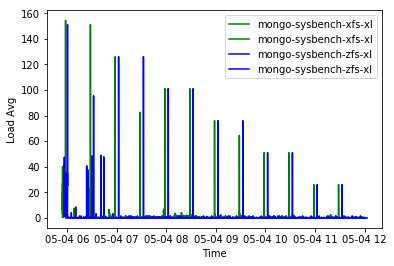

 * postgresql://postgres@localhost:5432/benchplatform
 * postgresql://postgres@localhost:5432/benchplatform
 * postgresql://postgres@localhost:5432/benchplatform
 * postgresql://postgres@localhost:5432/benchplatform
 * postgresql://postgres@localhost:5432/benchplatform
 * postgresql://postgres@localhost:5432/benchplatform
 * postgresql://postgres@localhost:5432/benchplatform
 * postgresql://postgres@localhost:5432/benchplatform


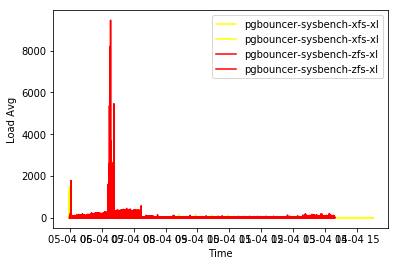

 * postgresql://postgres@localhost:5432/benchplatform
 * postgresql://postgres@localhost:5432/benchplatform
 * postgresql://postgres@localhost:5432/benchplatform
 * postgresql://postgres@localhost:5432/benchplatform
 * postgresql://postgres@localhost:5432/benchplatform
 * postgresql://postgres@localhost:5432/benchplatform
 * postgresql://postgres@localhost:5432/benchplatform
 * postgresql://postgres@localhost:5432/benchplatform


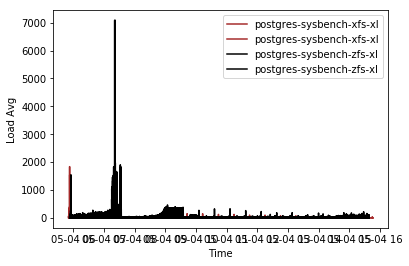

 * postgresql://postgres@localhost:5432/benchplatform
 * postgresql://postgres@localhost:5432/benchplatform
 * postgresql://postgres@localhost:5432/benchplatform
 * postgresql://postgres@localhost:5432/benchplatform
 * postgresql://postgres@localhost:5432/benchplatform
 * postgresql://postgres@localhost:5432/benchplatform
 * postgresql://postgres@localhost:5432/benchplatform
 * postgresql://postgres@localhost:5432/benchplatform


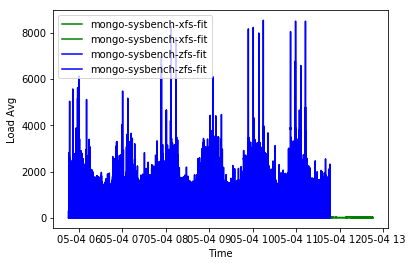

 * postgresql://postgres@localhost:5432/benchplatform
 * postgresql://postgres@localhost:5432/benchplatform
 * postgresql://postgres@localhost:5432/benchplatform
 * postgresql://postgres@localhost:5432/benchplatform
 * postgresql://postgres@localhost:5432/benchplatform
 * postgresql://postgres@localhost:5432/benchplatform
 * postgresql://postgres@localhost:5432/benchplatform
 * postgresql://postgres@localhost:5432/benchplatform


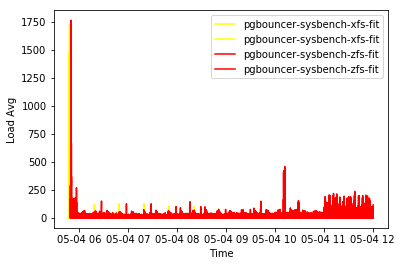

 * postgresql://postgres@localhost:5432/benchplatform
 * postgresql://postgres@localhost:5432/benchplatform
 * postgresql://postgres@localhost:5432/benchplatform
 * postgresql://postgres@localhost:5432/benchplatform
 * postgresql://postgres@localhost:5432/benchplatform
 * postgresql://postgres@localhost:5432/benchplatform
 * postgresql://postgres@localhost:5432/benchplatform
 * postgresql://postgres@localhost:5432/benchplatform


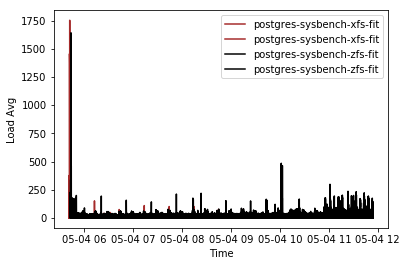

In [26]:
# MONGO XL
pltmongoxl = plotRun('8a32b055-1220-ff7b-be8f-07ddd03c8315','green') # xfs
pltmongoxl = plotRun('8c8c92e2-199c-0f21-d529-7600ab56f07d', 'blue') # zfs
pltmongoxl.show()

# PGBOUNCER XL
pltpgbxl = plotRun('4ff865c6-06a1-9508-65e6-f30891e64124','yellow') # xfs
pltpgbxl = plotRun('a3e684aa-1308-ab49-b78b-749e2e679006', 'red') # zfs
pltpgbxl.show()

# POSTGRES XL
pltpoxl = plotRun('50280e3d-52f6-3dc5-7cfe-73ac767b0f89','brown') # xfs
pltpoxl = plotRun('4a4691b4-2ffb-db97-29fe-260c97349512', 'black') # zfs
pltpoxl.show()

# MONGO FIT
pltmng = plotRun('bc0abe95-3652-f7b9-a829-cb7c4a6b4304','green') # xfs
pltmng = plotRun('be4af4dd-bbe1-0ca5-aeb4-13118611b3ba', 'blue') # zfs
pltmng.show()

# PGBOUNCER FIT
pltpgb = plotRun('4ca4ab12-2ab3-9407-2495-efb0aa13835e','yellow') # xfs
pltpgb = plotRun('f1f7b29a-ebe8-1997-a00c-8df20b848752', 'red') # zfs
pltpgb.show()
# POSTGRES FIT
pltpo = plotRun('874c34e2-a81f-6e02-4dc5-6921faf8881d','brown') # xfs
pltpo = plotRun('e1e8fa66-d6aa-42b1-ef30-62c0928cec27', 'black') # zfs
pltpo.show()